# ANN : Image classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

4423680/4422102 [==============================] - 30s 7us/step
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]


(60000, 28, 28)

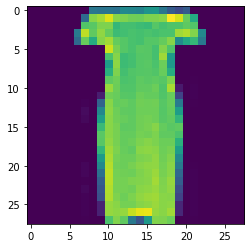

In [3]:
data = keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = data.load_data()
print(x_train[100]) #each cloth pic is of form 28x28 pixels matrix, 0shows black color
plt.imshow(x_train[51]) #the cloth
print(y_train[5]) #the number reated to the cloth in th dataset
classes=["tshirt", "trousers", "pullover", "dress", "coat", "sandal",
         "shirt", "sneakers", "bag", "boot"]
print(classes[y_train[5]])
x_train.shape

In [4]:
#input is converted to 0 to 1 range 
x_train_p=x_train / 255.
x_test_p=x_test / 255.
#print(x_train[0])

#spliting of data into training and testing set 
#training set has 60000 data(validation set : 5000 and training set: 550000))
#test set is of 100000 data
x_valid,x_train_=x_train_p[:5000],x_train_p[5000:]
y_valid,y_train_=y_train[:5000],y_train[5000:]
x_test,y_test=x_test_p[:],y_test[:]
y_train.shape


(60000,)

In [5]:
#defining seed :  it is used to replicate the same result everytime when the same code is run in the future
np.random.seed(42)
tf.random.set_seed(42)


In [6]:
#creating model 
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #flaten is used so that input in no 2d mat nut 784 pixels
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax")) #as there are 10 classes
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [81]:
import pydot  #its ans interface in pyhton to create, manipulate,and show the graphical view
keras.utils.plot_model(model)


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [9]:
weights,biases=model.layers[3].get_weights()

weights.shape

(100, 10)

In [10]:
#before training and optimizing the data, defining the loss fn and other imp things
model.compile(loss="sparse_categorical_crossentropy",  #as o/p is in the form of label, if th o/p is in the form of prob. the sparse id deleted
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
early_stopping=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True) #very important as avoid overfitting

In [12]:
#fit the data into the model, and training data
model_history=model.fit(x_train_,y_train_,epochs=30,validation_data=(x_valid,y_valid),
                        callbacks=[early_stopping])


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 185us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4844 - accuracy: 0.8323 - val_loss: 0.4538 - val_accuracy: 0.8488
Epoch 3/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.4414 - accuracy: 0.8463 - val_loss: 0.4377 - val_accuracy: 0.8506
Epoch 4/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4130 - accuracy: 0.8548 - val_loss: 0.4153 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3927 - accuracy: 0.8617 - val_loss: 0.3815 - val_accuracy: 0.8638
Epoch 6/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.3769 - accuracy: 0.8667 - val_loss: 0.3723 - val_accuracy: 0.8678
Epoch 7/30
55000/55000 [==========================

In [13]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [14]:
model_history.history

{'loss': [0.7225696415641091,
  0.48439070107286625,
  0.44139317091161556,
  0.41302711292396893,
  0.39265404234365986,
  0.37694750641042535,
  0.36247804353887386,
  0.3515613202398474,
  0.3419376902103424,
  0.3324260404933583,
  0.32399311422217975,
  0.3159532498879866,
  0.3073068986047398,
  0.30171284677548843,
  0.295256695504622,
  0.28986769248572264,
  0.28338151187246496,
  0.2782488758737391,
  0.2729988081715324,
  0.2679870995759964,
  0.2633764246593822,
  0.2576506985469298,
  0.25387664009657773,
  0.24917217266342856,
  0.24531154932975768,
  0.24076604256196454],
 'accuracy': [0.7641091,
  0.8322545,
  0.8462727,
  0.8547636,
  0.8616727,
  0.86667275,
  0.8727273,
  0.8745273,
  0.87732726,
  0.8810909,
  0.8839818,
  0.88716364,
  0.89050907,
  0.89216363,
  0.8936727,
  0.89625454,
  0.89910907,
  0.8998727,
  0.90221816,
  0.9038909,
  0.9046364,
  0.90703636,
  0.9088909,
  0.91041815,
  0.9127455,
  0.9141091],
 'val_loss': [0.5073241458892822,
  0.4538289

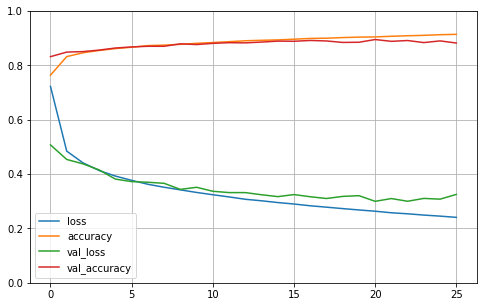

In [15]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 5s 499us/sample - loss: 0.3313 - accuracy: 0.8813


[0.33126015031337736, 0.8813]

In [21]:
x_new=x_test[:3] #3 data from test data set as unknow data to test or prediction of the model
y_probablity=model.predict(x_new)
y_probablity.round(2) #roundoff to 2 decimal places


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
y_probablity=model.predict_classes(x_new)
y_probablity

array([9, 2, 1], dtype=int64)

['boot' 'pullover' 'trousers']
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


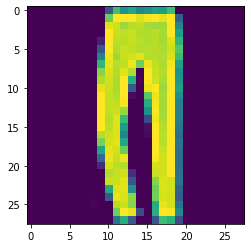

In [23]:
output=np.array(classes)[y_probablity]
print(output)
print(plt.imshow(x_new[0]))
print(plt.imshow(x_new[1]))
print(plt.imshow(x_new[2]))

# CNN :Image Classifier

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
classes=["tshirt", "trousers", "pullover", "dress", "coat", "sandal",
         "shirt", "sneakers", "bag", "boot"]

In [40]:
#data reshaping, to make the image 3D to have channels of(RGB)
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))


In [41]:
# Data noramlization
x_train_n=x_train/255.



In [29]:
#splitting training into training and validation dataset
x_valid, x_train_=x_train_n[:5000],x_train_n[5000:]
y_valid, y_train_=y_train[:5000],y_train[5000:]


In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
#model architecture

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,    #3x3 window/filter size
                              padding="valid", activation="relu", input_shape=(28,28,1))) #1 is for vhannel in input_shape
model.add(keras.layers.MaxPool2D(2,2)) #dimension of window or receptive field is 2x2
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
early_stopping=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [33]:
modelhistory=model.fit(x_train_,y_train_,epochs=6,validation_data=(x_valid,y_valid), batch_size=64, callbacks=[early_stopping])

Train on 55000 samples, validate on 5000 samples
Epoch 1/6
55000/55000 [==============================] - 47s 847us/sample - loss: 0.8753 - accuracy: 0.7050 - val_loss: 0.5987 - val_accuracy: 0.7788
Epoch 2/6
55000/55000 [==============================] - 49s 889us/sample - loss: 0.5382 - accuracy: 0.8052 - val_loss: 0.5426 - val_accuracy: 0.8024
Epoch 3/6
55000/55000 [==============================] - 43s 782us/sample - loss: 0.4796 - accuracy: 0.8277 - val_loss: 0.5617 - val_accuracy: 0.8118
Epoch 4/6
55000/55000 [==============================] - 46s 840us/sample - loss: 0.4431 - accuracy: 0.8416 - val_loss: 0.4597 - val_accuracy: 0.8384
Epoch 5/6
55000/55000 [==============================] - 47s 860us/sample - loss: 0.4161 - accuracy: 0.8516 - val_loss: 0.4402 - val_accuracy: 0.8384
Epoch 6/6
55000/55000 [==============================] - 49s 889us/sample - loss: 0.3971 - accuracy: 0.8576 - val_loss: 0.4210 - val_accuracy: 0.8450


In [43]:
model.evaluate(x_test,y_test)
print(y_test.shape)
print(x_test_n.shape)

10000/10000 [==============================] - 5s 521us/sample - loss: 0.4536 - accuracy: 0.8311
(10000,)
(10000, 28, 28, 1)


In [46]:
x_new=x_test[3:9]
y_pred=model.predict_classes(x_new)
y_pred


array([1, 6, 1, 4, 6, 5], dtype=int64)

In [47]:
np.array(classes)[y_pred]

array(['trousers', 'shirt', 'trousers', 'coat', 'shirt', 'sandal'],
      dtype='<U8')

# CNN : cat and dog (without transfer learning and data augmentation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras 



In [2]:
train_data_dir= r"C:\Users\user\Desktop\deep learning dataset\cats_and_dogs_small\train"
valid_data_dir= r"C:\Users\user\Desktop\deep learning dataset\cats_and_dogs_small\validation"
test_data_dir= r"C:\Users\user\Desktop\deep learning dataset\cats_and_dogs_small\test"
train_data_dir

'C:\\Users\\user\\Desktop\\deep learning dataset\\cats_and_dogs_small\\train'

# This image is to be converted into the pixels form

1. read the image
2. Decode the image from jpg to rgb
3. convert these into floating point tensors
4. now convert the pixel values b/w (0,1)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
#other augametations can also be appplied like shear, height ,etc which 
#resolves the problem of overfitting

train_gen = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode=("binary")
)
valid_gen = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode=("binary")
)
test_gen = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode=("binary")
)
#batch_size means data is trained or validated in the group of 20 data while training the data



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["accuracy"])


In [10]:
history=model.fit_generator(train_gen, steps_per_epoch=100,
                            epochs=20, validation_data=valid_gen,
                            validation_steps=50) #steps per epoch means  no. of training data/batch_size

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 122s 1s/step - loss: 0.6728 - accuracy: 0.5855 - val_loss: 0.6864 - val_accuracy: 0.5500
Epoch 2/20
100/100 [==============================] - 90s 899ms/step - loss: 0.6306 - accuracy: 0.6505 - val_loss: 0.6431 - val_accuracy: 0.6190
Epoch 3/20
100/100 [==============================] - 80s 799ms/step - loss: 0.5808 - accuracy: 0.6930 - val_loss: 0.5993 - val_accuracy: 0.6800
Epoch 4/20
100/100 [==============================] - 76s 761ms/step - loss: 0.5507 - accuracy: 0.7175 - val_loss: 0.6008 - val_accuracy: 0.6680
Epoch 5/20
100/100 [==============================] - 79s 788ms/step - loss: 0.5188 - accuracy: 0.7460 - val_loss: 0.6373 - val_accuracy: 0.6490
Epoch 6/20
100/100 [==============================] - 77s 768ms/step - loss: 0.4960 - accuracy: 0.7535 - val_loss: 0.5790 - val_accuracy: 0.6920
Epoch 7/20
100/100 [===================

In [12]:
model.evaluate(test_gen,steps=50)

  ...
    to  
  ['...']
50/50 [==============================] - 10s 198ms/step - loss: 0.6901 - accuracy: 0.7310


[0.6900699138641357, 0.731]

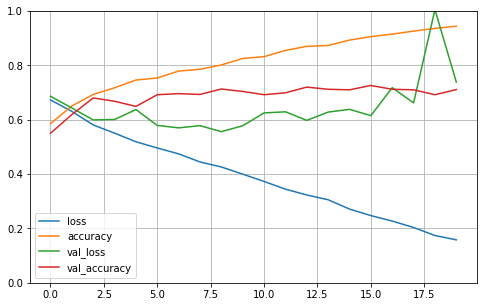

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Transfer Learning :VGG16 (a pretrained model to be imported) with data augmentation.

In [39]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


train_gen = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode=("binary")
)
valid_gen = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode=("binary")
)
test_gen = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode=("binary")
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
from tensorflow.keras.applications import VGG16

conv_base=VGG16(weights="imagenet", include_top=False, 
                input_shape=(150,150,3))

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [42]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [43]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss="binary_crossentropy", metrics=["acc"],
              optimizer=keras.optimizers.RMSprop(lr=2e-5))

In [48]:
checkpoint=keras.callbacks.ModelCheckpoint("Model.h5",save_best_only=True)

In [49]:
history=model.fit_generator(train_gen, validation_data=(valid_gen),
                            epochs=30, steps_per_epoch=100, validation_steps=50,
                            callbacks=[checkpoint])


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 1218s 12s/step - loss: 0.2306 - acc: 0.9160 - val_loss: 0.1273 - val_acc: 0.9540
Epoch 2/30
100/100 [==============================] - 1125s 11s/step - loss: 0.1853 - acc: 0.9240 - val_loss: 0.1192 - val_acc: 0.9590
Epoch 3/30
100/100 [==============================] - 1113s 11s/step - loss: 0.1568 - acc: 0.9375 - val_loss: 0.1372 - val_acc: 0.9610
Epoch 4/30
100/100 [==============================] - 1134s 11s/step - loss: 0.1460 - acc: 0.9395 - val_loss: 0.1710 - val_acc: 0.9260
Epoch 5/30
100/100 [==============================] - 1158s 12s/step - loss: 0.1146 - acc: 0.9500 - val_loss: 0.1012 - val_acc: 0.9630
Epoch 6/30
100/100 [==============================] - 27560s 276s/step - loss: 0.1079 - acc: 0.9520 - val_loss: 0.1274 - val_acc: 0.9680
Epoch 7/30
100/100 [==============================] - 2309s 23s/step - loss: 0.1002 - acc: 0.96

In [50]:
model.evaluate_generator(test_gen,steps=50)

  ...
    to  
  ['...']


[0.1498353534085618, 0.972]

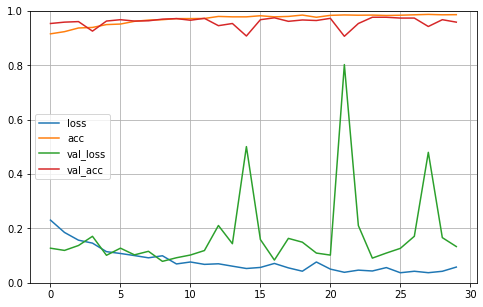

In [51]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
del model
keras.backend.clear_session()

In [60]:
model=keras.models.load_model("Model.h5")